In [1]:
import numpy as np
import os
import urllib
import re
import bs4
import pandas as pd
import datetime
import requests
import tempfile
import zipfile
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering

In [2]:

df_text_versions = pd.read_csv(r'C:\Users\Axel\Desktop\projet stat\deep_course_cf_text_versions.csv', low_memory = False)
df_text_versions_node = pd.read_csv(r'C:\Users\Axel\Desktop\projet stat\deep_course_cf_text_version_nodes.csv', low_memory = False)
df_themes = pd.read_csv(r'C:\Users\Axel\Desktop\projet stat\deep_course_cf_themes.csv', low_memory = False)
df_types = pd.read_csv(r'C:\Users\Axel\Desktop\projet stat\deep_course_cf_types.csv', low_memory = False)
df_nodes = pd.read_csv(r'C:\Users\Axel\Desktop\projet stat\deep_course_cm_nodes.csv', low_memory = False)

df_formulaire_question = pd.read_csv(r'C:\Users\Axel\Desktop\projet stat\deep_course_formulaire_question.csv', low_memory = False)
df_formulaire_questionnaire = pd.read_csv(r'C:\Users\Axel\Desktop\projet stat\deep_course_formulaire_questionnaire.csv', low_memory = False)
df_formulaire_questionnaire_pages = pd.read_csv(r'C:\Users\Axel\Desktop\projet stat\deep_course_formulaire_questionnaire_pages.csv', low_memory = False)
df_formulaire_question_choix = pd.read_csv(r'C:\Users\Axel\Desktop\projet stat\deep_course_formulaire_question_choix.csv', low_memory = False)
df_formulaire_reponse = pd.read_csv(r'C:\Users\Axel\Desktop\projet stat\deep_course_formulaire_reponse.csv', low_memory = False)
df_formulaire_page_questions = pd.read_csv(r'C:\Users\Axel\Desktop\projet stat\deep_course_formulaire_page_questions.csv', low_memory = False)

## Base texte

In [3]:

df_themes.columns = df_themes.columns.str.replace('id','theme_id')
df = pd.merge(df_text_versions, df_themes, on='theme_id')

df_types.columns = df_types.columns.str.replace('id','type_id')
df_text = pd.merge(df, df_types, on="type_id")
df_text

,surrogate_uuid,group_id,txt_name,theme_id,type_id,domain,theme,applicabilité
0,2c90f588404b484801404d8600d87748,TXA9548,RÈGLEMENT (UE) N°715/2013 DE LA COMMISSION du ...,4028807d16245e4d01162524c71b6a4d,4028807d16245e4d01162524ed896c33,1. ENVIRONNEMENT,Déchets,Applicable
1,2c90f58846fdd49601476d7519a334ea,TXA6524,Règlement (CE) n° 1418/2007 du 29 novembre 200...,4028807d16245e4d01162524c71b6a4d,4028807d16245e4d01162524ed896c33,1. ENVIRONNEMENT,Déchets,Applicable
2,2c90f589515fb45c01516335125951f6,TXA5166,Règlement (CE) n° 1013/2006 du Parlement europ...,4028807d16245e4d01162524c71b6a4d,4028807d16245e4d01162524ed896c33,1. ENVIRONNEMENT,Déchets,Applicable
3,4028807d16245e4d0116254356975904,TXA3451,Règlement du Conseil n° 259/93 du 1er février ...,4028807d16245e4d01162524c71b6a4d,4028807d16245e4d01162524ed896c33,1. ENVIRONNEMENT,Déchets,Applicable
4,4028807d16245e4d01162546ca9d716c,TXA6370,Règlement n° 574/2004 de la Commission du 23 f...,4028807d16245e4d01162524c71b6a4d,4028807d16245e4d01162524ed896c33,1. ENVIRONNEMENT,Déchets,Applicable
...,...,...,...,...,...,...,...,...
3510,d37394c51f4080df011f4ca3ec6f2126,TXA7445,Recommandation de la Commission du 22 décembre...,4028807d16245e4d01162524cb036a7a,4028807d16245e4d01162524ec3c6c21,2. PRODUITS CHIMIQUES,Risques chimiques / Substances particulières,Pour information
3511,d37394d91b659d9b011b6905760d0078,TXA7106,Recommandation de la Commission du 29 avril 20...,4028807d16245e4d01162524cb036a7a,4028807d16245e4d01162524ec3c6c21,2. PRODUITS CHIMIQUES,Risques chimiques / Substances particulières,Pour information
3512,d37394c529051639012921c63d1269f0,TXA8472,"Partie H de l'annexe ""exploitation des téléski...",d37394c53120b52601313c3107f77043,4028807d16245e4d01162524eec86c45,3. SÉCURITÉ,Remontées mécaniques - Transports guidés/perso...,Pour information
3513,d37394c529051639012921ee2d236c5a,TXA8473,RM4 conception générale des téléskis. Annexe à...,d37394c53120b52601313c3107f77043,4028807d16245e4d01162524eec86c45,3. SÉCURITÉ,Remontées mécaniques - Transports guidés/perso...,Pour information


In [4]:
(df_text['domain'].value_counts()*100/df_text['domain'].count()).sort_values(ascending=False)

1. ENVIRONNEMENT                                      48.904694
3. SÉCURITÉ                                           31.379801
6. ENERGIE                                             8.876245
2. PRODUITS CHIMIQUES                                  4.381223
4. INSPECTION                                          3.783784
7. SÛRETÉ                                              1.820768
5. TRANSPORT DE MARCHANDISES DANGEREUSES ET AUTRES     0.625889
8. SECURITE ALIMENTAIRE                                0.227596
Name: domain, dtype: float64

## Base client 

In [5]:

df_appliques = pd.merge(df_text_versions_node, df_text, how='left', left_on = ['txt_version_surrogate_uuid'], right_on = ['surrogate_uuid'])

In [6]:
df_appliques.head()

,txt_version_surrogate_uuid,txt_node_id,surrogate_uuid,group_id,txt_name,theme_id,type_id,domain,theme,applicabilité
0,d37394453d6ac204013d6d847b0a4b3a,2c90f5883f44af68013f564a1326558a,d37394453d6ac204013d6d847b0a4b3a,TXA9448,Décision BSEI n° 2012-150 du 17 décembre 2012 ...,ff8081816b4d71ef016b54dd71e53d99,4028807d16245e4d01162524e20d6b91,1. ENVIRONNEMENT,Canalisations de transport,Applicable
1,d37394453a046068013a0c21f6824adc,2c90f5883f44af68013f564a1326558a,d37394453a046068013a0c21f6824adc,TXA9312,Avis relatif à l’analyse de la régularité des ...,ff8081816b4d71ef016b54e0b788416d,4028807d16245e4d01162524e20d6b91,1. ENVIRONNEMENT,Travaux à proximité des réseaux / Guichet unique,Applicable
2,d37394453c64588f013c70d1f1b31b49,2c90f5883f44af68013f564a1326558a,d37394453c64588f013c70d1f1b31b49,TXA9229,Arrêté du 12 juin 2012 portant agrément des la...,4028807d16245e4d01162524c4c46a32,d37394c5272f761f01273d899b5811d1,1. ENVIRONNEMENT,Pollution atmosphérique,Pour information
3,d3739445374d5348013783ef84d41b5c,2c90f5883f44af68013f564a1326558a,d3739445374d5348013783ef84d41b5c,TXA9212,Arrêté du 24 avril 2012 fixant les caractérist...,4028807d16245e4d01162524c9ec6a71,4028807d16245e4d01162524db946b37,1. ENVIRONNEMENT,Installations classées,Applicable
4,d373944539678fdb0139a42ace673d21,2c90f5883f44af68013f564a1326558a,d373944539678fdb0139a42ace673d21,TXA9136,Arrêté du 29 février 2012 fixant le contenu de...,4028807d16245e4d01162524c71b6a4d,4028807d16245e4d01162524db946b37,1. ENVIRONNEMENT,Déchets,Applicable


In [7]:
df_appliques_clean=df_appliques.dropna(axis=0)

In [8]:
df_appliques.shape

(329942, 10)

In [9]:
df_appliques_clean.groupby("surrogate_uuid")["surrogate_uuid"].count().sort_values(ascending= True).value_counts().head(20)

1     316
6     131
2     130
3     101
4      86
9      75
5      74
7      62
16     48
18     46
17     45
19     45
10     43
8      39
12     37
29     36
28     33
33     32
20     30
15     30
Name: surrogate_uuid, dtype: int64

In [10]:
iden=df_appliques_clean["surrogate_uuid"].drop_duplicates(keep = 'first').sort_values().reset_index(drop=True)

In [11]:
valeur=pd.Series((df_appliques_clean.groupby("surrogate_uuid")["surrogate_uuid"].count()==1).values)

In [12]:
mixte=pd.concat([iden,valeur],axis=1)
mixte

,surrogate_uuid,0
0,2c90f588404b484801404d8600d87748,False
1,2c90f588404b484801404dce49f11efc,False
2,2c90f588404b484801404df98f7140d7,False
3,2c90f588404b484801404dfacbff443e,False
4,2c90f588404b484801404e0154db49b0,False
...,...,...
3510,ff80818174e604090175024d98626791,False
3511,ff80818174e6040901750257377b0eed,False
3512,ff80818174e6040901750258b1891163,False
3513,ff80818174e60409017502da6e6d1ec6,False


In [13]:
liste=mixte.loc[mixte.iloc[:,1]==True,'surrogate_uuid'].values

In [14]:
df_appliques_clean2=df_appliques_clean.drop(df_appliques_clean.loc[df_appliques_clean["surrogate_uuid"].isin(liste)].index)

In [15]:
df_appliques_clean2.groupby("surrogate_uuid")["surrogate_uuid"].count().sort_values(ascending= True).value_counts().head(20)

6     131
2     130
3     101
4      86
9      75
5      74
7      62
16     48
18     46
17     45
19     45
10     43
8      39
12     37
29     36
28     33
33     32
15     30
20     30
14     29
Name: surrogate_uuid, dtype: int64

In [16]:
base_client_texte=df_appliques_clean2[['txt_node_id','surrogate_uuid']]

In [17]:
base_client_texte.shape

(322190, 2)

In [18]:
base_client_texte.reset_index(drop=True)

,txt_node_id,surrogate_uuid
0,2c90f5883f44af68013f564a1326558a,d37394453d6ac204013d6d847b0a4b3a
1,2c90f5883f44af68013f564a1326558a,d37394453a046068013a0c21f6824adc
2,2c90f5883f44af68013f564a1326558a,d37394453c64588f013c70d1f1b31b49
3,2c90f5883f44af68013f564a1326558a,d3739445374d5348013783ef84d41b5c
4,2c90f5883f44af68013f564a1326558a,d373944539678fdb0139a42ace673d21
...,...,...
322185,ff80818173787da801739e854673578c,2c90f58949c4b4ca0149f1e9b745274f
322186,ff80818173787da801739e854673578c,ff8081816cc9b7d5016cccca8dfc14e7
322187,ff80818173787da801739e854673578c,d3739445333b0e9c01336996466c31a1
322188,ff80818173787da801739e854673578c,d373944534afdf1e0134b3bb69031a2d


In [19]:
base_client_texte.describe()

,txt_node_id,surrogate_uuid
count,322190,322190
unique,572,3199
top,4028807d16245e4d0116249e4259205e,2c90f58864274849016427cf71e44af4
freq,1631,555


In [20]:
nom=base_client_texte['surrogate_uuid'].drop_duplicates(keep = 'first').sort_values(ascending= True).values

In [21]:
nom

array(['2c90f588404b484801404d8600d87748',
       '2c90f588404b484801404dce49f11efc',
       '2c90f588404b484801404df98f7140d7', ...,
       'ff80818174e6040901750258b1891163',
       'ff80818174e60409017502da6e6d1ec6',
       'ff808181755a45d801757a80417525ad'], dtype=object)

In [21]:
test=pd.get_dummies( data=base_client_texte, columns=['surrogate_uuid'])

In [22]:
test.columns

Index(['txt_node_id', 'surrogate_uuid_2c90f588404b484801404d8600d87748',
       'surrogate_uuid_2c90f588404b484801404dce49f11efc',
       'surrogate_uuid_2c90f588404b484801404df98f7140d7',
       'surrogate_uuid_2c90f588404b484801404dfacbff443e',
       'surrogate_uuid_2c90f588404b484801404e0154db49b0',
       'surrogate_uuid_2c90f588404b484801404e0553614a10',
       'surrogate_uuid_2c90f588404b484801404e5f94ee6d3f',
       'surrogate_uuid_2c90f588404b48480140588b113b2317',
       'surrogate_uuid_2c90f588404b4848014058a6510a2eb4',
       ...
       'surrogate_uuid_ff80818174e604090174fcd0e0e1372d',
       'surrogate_uuid_ff80818174e60409017501c7d3183828',
       'surrogate_uuid_ff80818174e604090175022423814ddb',
       'surrogate_uuid_ff80818174e6040901750243646351e0',
       'surrogate_uuid_ff80818174e604090175024a97fa635a',
       'surrogate_uuid_ff80818174e604090175024d98626791',
       'surrogate_uuid_ff80818174e6040901750257377b0eed',
       'surrogate_uuid_ff80818174e604090175025

In [23]:
for i in range (1, len(test.columns)):
    test[test.columns[i]].astype('int32',copy=False)

In [23]:
test.shape

(322190, 3200)

In [25]:
test2=test.groupby('txt_node_id').apply(np.sum).drop('txt_node_id',axis=1)

KeyboardInterrupt: 

In [46]:
test2

,txt_node_id,surrogate_uuid_2c90f588404b484801404d8600d87748,surrogate_uuid_2c90f588404b484801404dce49f11efc,surrogate_uuid_2c90f588404b484801404df98f7140d7,surrogate_uuid_2c90f588404b484801404dfacbff443e,surrogate_uuid_2c90f588404b484801404e0154db49b0,surrogate_uuid_2c90f588404b484801404e0553614a10,surrogate_uuid_2c90f588404b484801404e5f94ee6d3f,surrogate_uuid_2c90f588404b48480140588b113b2317,surrogate_uuid_2c90f588404b4848014058a6510a2eb4,...,surrogate_uuid_ff80818174e604090174fcd0e0e1372d,surrogate_uuid_ff80818174e60409017501c7d3183828,surrogate_uuid_ff80818174e604090175022423814ddb,surrogate_uuid_ff80818174e6040901750243646351e0,surrogate_uuid_ff80818174e604090175024a97fa635a,surrogate_uuid_ff80818174e604090175024d98626791,surrogate_uuid_ff80818174e6040901750257377b0eed,surrogate_uuid_ff80818174e6040901750258b1891163,surrogate_uuid_ff80818174e60409017502da6e6d1ec6,surrogate_uuid_ff808181755a45d801757a80417525ad
0,2c90f5883f44af68013f564a1326558a,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,2c90f5883fcf3281013fe7c2f0eb4dbe,0,1,0,0,0,0,0,0,0,...,1,0,1,0,1,0,0,0,1,1
2,2c90f588404b48480140ce4d7d301013,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,2c90f5884109d2c401410c40ae942d95,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,2c90f5884109d2c401410c4434a433a6,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
567,ff80818172c43c3a0172c675afe25945,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
568,ff80818172c43c3a0172c675f04f5afc,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
569,ff80818172c43c3a0172c67735895c2e,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
570,ff80818172c43c3a0172c7a3d28c62e5,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [ ]:
test2.to_csv(r'C:\Users\Axel\Desktop\projet stat\clust.csv')

## clustering

In [44]:
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering

In [49]:
test2.set_index('txt_node_id',drop=True,inplace=True)

In [50]:
model = AgglomerativeClustering(n_clusters=4,  )

model = model.fit(test2)

In [51]:
model.labels_

array([2, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 2, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2,
       2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 0,
       2, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 3, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 2, 2, 2, 0, 1, 1, 1, 1, 1, 1, 2, 1, 0,

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(model)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

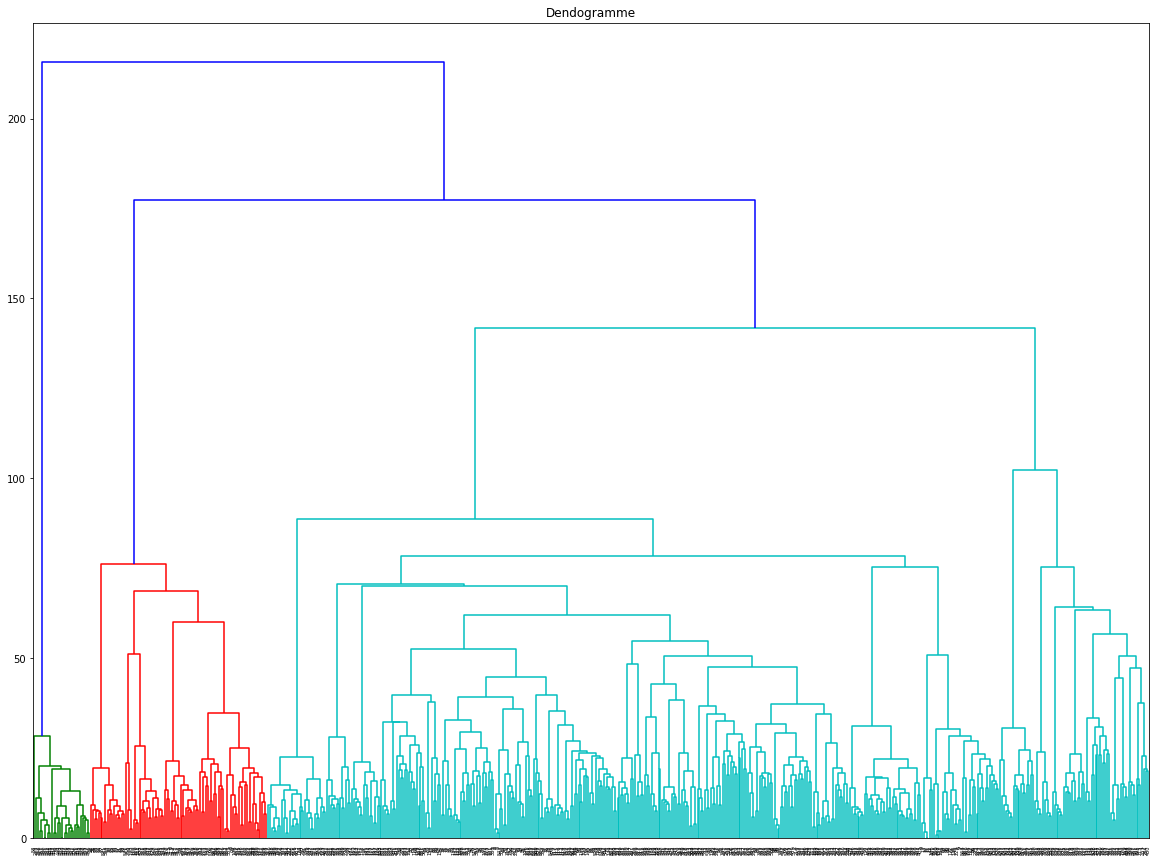

In [9]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(20, 15))
plt.title("Dendogramme")
dend = shc.dendrogram(shc.linkage(test2, method='ward'))
#plt.axhline(y=80,color='red',linestyle='--',linewidth=1.5)
plt.savefig(r'C:\Users\Axel\Desktop\projet stat\dendogramme2.png')
plt.show()

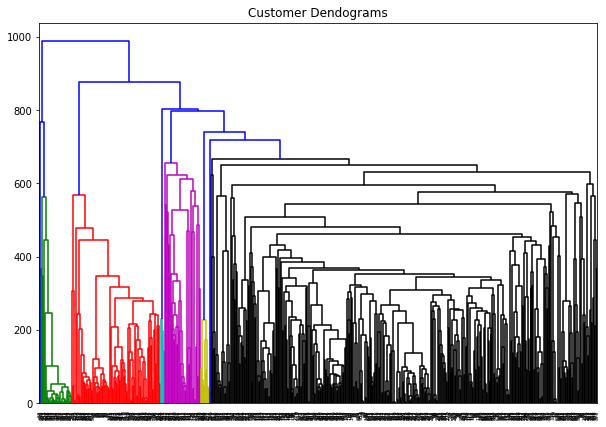

In [61]:
plt.figure(figsize=(10, 7))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(test2, method='weighted',metric='cityblock'))

In [ ]:
#plt.figure(figsize=(10, 7))
#plt.title("Customer Dendograms")
#dend = shc.dendrogram(shc.linkage(test2, method='average'))

In [ ]:
test2

In [ ]:
test2.columns=nom

In [ ]:
res=test2.copy()

In [ ]:
res['clust']=model.labels_

In [ ]:
res

In [ ]:
res['clust'].value_counts()

In [ ]:
res.to_csv(r'C:\Users\Axel\Desktop\projet stat\res_clust.csv')

# Analyse

In [47]:
res= pd.read_csv(r'C:\Users\Axel\Desktop\projet stat\res_clust.csv')
test2=pd.read_csv(r'C:\Users\Axel\Desktop\projet stat\clust.csv')
test2.set_index('txt_node_id',drop=True,inplace=True)

In [23]:
test2.reset_index(inplace=True)
test2

,txt_node_id,surrogate_uuid_2c90f588404b484801404d8600d87748,surrogate_uuid_2c90f588404b484801404dce49f11efc,surrogate_uuid_2c90f588404b484801404df98f7140d7,surrogate_uuid_2c90f588404b484801404dfacbff443e,surrogate_uuid_2c90f588404b484801404e0154db49b0,surrogate_uuid_2c90f588404b484801404e0553614a10,surrogate_uuid_2c90f588404b484801404e5f94ee6d3f,surrogate_uuid_2c90f588404b48480140588b113b2317,surrogate_uuid_2c90f588404b4848014058a6510a2eb4,...,surrogate_uuid_ff80818174e604090174fcd0e0e1372d,surrogate_uuid_ff80818174e60409017501c7d3183828,surrogate_uuid_ff80818174e604090175022423814ddb,surrogate_uuid_ff80818174e6040901750243646351e0,surrogate_uuid_ff80818174e604090175024a97fa635a,surrogate_uuid_ff80818174e604090175024d98626791,surrogate_uuid_ff80818174e6040901750257377b0eed,surrogate_uuid_ff80818174e6040901750258b1891163,surrogate_uuid_ff80818174e60409017502da6e6d1ec6,surrogate_uuid_ff808181755a45d801757a80417525ad
0,2c90f5883f44af68013f564a1326558a,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,2c90f5883fcf3281013fe7c2f0eb4dbe,0,1,0,0,0,0,0,0,0,...,1,0,1,0,1,0,0,0,1,1
2,2c90f588404b48480140ce4d7d301013,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,2c90f5884109d2c401410c40ae942d95,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,2c90f5884109d2c401410c4434a433a6,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
567,ff80818172c43c3a0172c675afe25945,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
568,ff80818172c43c3a0172c675f04f5afc,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
569,ff80818172c43c3a0172c67735895c2e,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
570,ff80818172c43c3a0172c7a3d28c62e5,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [28]:
df_rep=pd.read_csv(r'C:\Users\Axel\Desktop\projet stat\df_reponses.csv')

In [36]:
df_rep

,node_id,006F52E9102A8D3BE2FE5614F42BA989_0.0,006F52E9102A8D3BE2FE5614F42BA989_1.0,006F52E9102A8D3BE2FE5614F42BA989_nan,013D407166EC4FA56EB1E1F8CBE183B9_0.0,013D407166EC4FA56EB1E1F8CBE183B9_1.0,013D407166EC4FA56EB1E1F8CBE183B9_nan,02522A2B2726FB0A03BB19F2D8D9524D_0.0,02522A2B2726FB0A03BB19F2D8D9524D_1.0,02522A2B2726FB0A03BB19F2D8D9524D_nan,...,F7E6C85504CE6E82442C770F7C8606F0_nan,FA7CDFAD1A5AAF8370EBEDA47A1FF1C3_0.0,FA7CDFAD1A5AAF8370EBEDA47A1FF1C3_1.0,FA7CDFAD1A5AAF8370EBEDA47A1FF1C3_nan,FBD7939D674997CDB4692D34DE8633C4_0.0,FBD7939D674997CDB4692D34DE8633C4_1.0,FBD7939D674997CDB4692D34DE8633C4_nan,FC221309746013AC554571FBD180E1C8_0.0,FC221309746013AC554571FBD180E1C8_1.0,FC221309746013AC554571FBD180E1C8_nan
0,2c90f5883f44af68013f564a1326558a,0,1,0,1,0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
1,2c90f5883fcf3281013fe7c2f0eb4dbe,0,1,0,0,1,0,1,0,0,...,0,0,0,1,0,1,0,1,0,0
2,2c90f588404b48480140ce4d7d301013,1,0,0,1,0,0,1,0,0,...,0,0,0,1,0,1,0,0,1,0
3,2c90f5884109d2c401410c40ae942d95,0,1,0,0,1,0,0,1,0,...,0,0,0,1,0,1,0,1,0,0
4,2c90f5884109d2c401410c4434a433a6,0,1,0,1,0,0,1,0,0,...,0,0,1,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438,ff808181717a658e017181c0a2022261,0,1,0,1,0,0,1,0,0,...,0,0,0,1,0,1,0,0,1,0
439,ff808181717a658e017181c124ca22c6,0,1,0,1,0,0,1,0,0,...,0,0,0,1,0,1,0,0,1,0
440,ff808181725806fc017299554104555f,0,0,1,1,0,0,0,1,0,...,1,0,0,1,0,1,0,0,0,1
441,ff80818172c43c3a0172c7a3d28c62e5,0,1,0,1,0,0,0,1,0,...,0,0,0,1,0,1,0,1,0,0


In [34]:
textok=df_rep['node_id'].values

In [40]:
test3=test2.loc[test2['txt_node_id'].isin(textok)]
test3.set_index('txt_node_id',drop=True,inplace=True)

In [28]:
info_text=df_text[['surrogate_uuid','domain','theme']]

In [29]:
base=base_client_texte.copy()

In [30]:
base.head()

,txt_node_id,surrogate_uuid
0,2c90f5883f44af68013f564a1326558a,d37394453d6ac204013d6d847b0a4b3a
1,2c90f5883f44af68013f564a1326558a,d37394453a046068013a0c21f6824adc
2,2c90f5883f44af68013f564a1326558a,d37394453c64588f013c70d1f1b31b49
3,2c90f5883f44af68013f564a1326558a,d3739445374d5348013783ef84d41b5c
4,2c90f5883f44af68013f564a1326558a,d373944539678fdb0139a42ace673d21


### On merge

In [31]:
fus=pd.merge(base,info_text, how='left', on='surrogate_uuid')
fus.head()

,txt_node_id,surrogate_uuid,domain,theme
0,2c90f5883f44af68013f564a1326558a,d37394453d6ac204013d6d847b0a4b3a,1. ENVIRONNEMENT,Canalisations de transport
1,2c90f5883f44af68013f564a1326558a,d37394453a046068013a0c21f6824adc,1. ENVIRONNEMENT,Travaux à proximité des réseaux / Guichet unique
2,2c90f5883f44af68013f564a1326558a,d37394453c64588f013c70d1f1b31b49,1. ENVIRONNEMENT,Pollution atmosphérique
3,2c90f5883f44af68013f564a1326558a,d3739445374d5348013783ef84d41b5c,1. ENVIRONNEMENT,Installations classées
4,2c90f5883f44af68013f564a1326558a,d373944539678fdb0139a42ace673d21,1. ENVIRONNEMENT,Déchets


In [32]:
fus2=pd.merge(fus,res[['txt_node_id','clust']],how='left', on='txt_node_id')
fus2.head()

,txt_node_id,surrogate_uuid,domain,theme,clust
0,2c90f5883f44af68013f564a1326558a,d37394453d6ac204013d6d847b0a4b3a,1. ENVIRONNEMENT,Canalisations de transport,2
1,2c90f5883f44af68013f564a1326558a,d37394453a046068013a0c21f6824adc,1. ENVIRONNEMENT,Travaux à proximité des réseaux / Guichet unique,2
2,2c90f5883f44af68013f564a1326558a,d37394453c64588f013c70d1f1b31b49,1. ENVIRONNEMENT,Pollution atmosphérique,2
3,2c90f5883f44af68013f564a1326558a,d3739445374d5348013783ef84d41b5c,1. ENVIRONNEMENT,Installations classées,2
4,2c90f5883f44af68013f564a1326558a,d373944539678fdb0139a42ace673d21,1. ENVIRONNEMENT,Déchets,2


## Analyse sur les domaines

### cluster 0

In [ ]:
fus2.loc[fus2['clust']==0]['txt_node_id'].drop_duplicates(keep = 'first').count()

In [ ]:
table=(fus2.loc[fus2['clust']==0].groupby('txt_node_id')['domain'].value_counts()/fus2.loc[fus2['clust']==0].groupby('txt_node_id')['domain'].count())*100

In [ ]:
table.groupby('domain').mean()

In [ ]:
table.groupby('domain').sum()/fus2.loc[fus2['clust']==0]['txt_node_id'].drop_duplicates(keep = 'first').count()

### cluster 1

In [33]:
fus2.loc[fus2['clust']==1]['txt_node_id'].drop_duplicates(keep = 'first').count()

375

In [34]:
table=(fus2.loc[fus2['clust']==1].groupby('txt_node_id')['domain'].value_counts()/fus2.loc[fus2['clust']==1].groupby('txt_node_id')['domain'].count())*100
table.groupby('domain').mean()

domain
1. ENVIRONNEMENT                                      32.472424
2. PRODUITS CHIMIQUES                                  3.285261
3. SÉCURITÉ                                           56.030719
4. INSPECTION                                          3.125043
5. TRANSPORT DE MARCHANDISES DANGEREUSES ET AUTRES     0.338580
6. ENERGIE                                             5.246976
7. SÛRETÉ                                              2.481456
8. SECURITE ALIMENTAIRE                                0.396605
Name: domain, dtype: float64

In [35]:
table.groupby('domain').sum()/fus2.loc[fus2['clust']==1]['txt_node_id'].drop_duplicates(keep = 'first').count()

domain
1. ENVIRONNEMENT                                      32.039458
2. PRODUITS CHIMIQUES                                  3.285261
3. SÉCURITÉ                                           56.030719
4. INSPECTION                                          3.025041
5. TRANSPORT DE MARCHANDISES DANGEREUSES ET AUTRES     0.309688
6. ENERGIE                                             5.065080
7. SÛRETÉ                                              0.165430
8. SECURITE ALIMENTAIRE                                0.079321
Name: domain, dtype: float64

### cluster 2

In [ ]:
fus2.loc[fus2['clust']==2]['txt_node_id'].drop_duplicates(keep = 'first').count()

In [ ]:
table=(fus2.loc[fus2['clust']==2].groupby('txt_node_id')['domain'].value_counts()/fus2.loc[fus2['clust']==2].groupby('txt_node_id')['domain'].count())*100
table.groupby('domain').mean()

In [ ]:
table.groupby('domain').sum()/fus2.loc[fus2['clust']==2]['txt_node_id'].drop_duplicates(keep = 'first').count()

### cluster 3

In [ ]:
fus2.loc[fus2['clust']==3]['txt_node_id'].drop_duplicates(keep = 'first').count()

In [ ]:
table=(fus2.loc[fus2['clust']==3].groupby('txt_node_id')['domain'].value_counts()/fus2.loc[fus2['clust']==3].groupby('txt_node_id')['domain'].count())*100
table.groupby('domain').mean()

In [ ]:
table.groupby('domain').sum()/fus2.loc[fus2['clust']==3]['txt_node_id'].drop_duplicates(keep = 'first').count()

### general

In [ ]:
fus2['txt_node_id'].drop_duplicates(keep = 'first').count()

In [ ]:
table=(fus2.groupby('txt_node_id')['domain'].value_counts()/fus2.groupby('txt_node_id')['domain'].count())*100
table.groupby('domain').mean()

In [ ]:
table.groupby('domain').sum()/fus2['txt_node_id'].drop_duplicates(keep = 'first').count()

## Analyse sur les thèmes

### cluster 0

In [ ]:
table=(fus2.loc[fus2['clust']==0].groupby('txt_node_id')['theme'].value_counts()/fus2.loc[fus2['clust']==0].groupby('txt_node_id')['theme'].count())*100
table.groupby('theme').mean().sort_values(ascending=False).head(10)

In [ ]:
(table.groupby('theme').sum()/fus2.loc[fus2['clust']==0]['txt_node_id'].drop_duplicates(keep = 'first').count()).sort_values(ascending=False).head(10)

### cluster 1

In [ ]:
table=(fus2.loc[fus2['clust']==1].groupby('txt_node_id')['theme'].value_counts()/fus2.loc[fus2['clust']==1].groupby('txt_node_id')['theme'].count())*100
table.groupby('theme').mean().sort_values(ascending=False).head(10)

In [ ]:
(table.groupby('theme').sum()/fus2.loc[fus2['clust']==1]['txt_node_id'].drop_duplicates(keep = 'first').count()).sort_values(ascending=False).head(10)

### cluster 2

In [ ]:
table=(fus2.loc[fus2['clust']==2].groupby('txt_node_id')['theme'].value_counts()/fus2.loc[fus2['clust']==2].groupby('txt_node_id')['theme'].count())*100
table.groupby('theme').mean().sort_values(ascending=False).head(10)

In [ ]:
(table.groupby('theme').sum()/fus2.loc[fus2['clust']==2]['txt_node_id'].drop_duplicates(keep = 'first').count()).sort_values(ascending=False).head(10)

### cluster 3

In [42]:
table=(fus2.loc[fus2['clust']==3].groupby('txt_node_id')['theme'].value_counts()/fus2.loc[fus2['clust']==3].groupby('txt_node_id')['theme'].count())*100
table.groupby('theme').mean().sort_values(ascending=False).head(10)

theme
Installations classées                          13.824736
Principes Généraux Sécurité                      9.023234
Déchets                                          6.028651
Service de santé au travail                      5.750112
Pollution atmosphérique                          5.403004
Equipements sous pression                        4.188907
Principes Généraux Environnement                 3.815875
Personnel                                        3.502194
Eau                                              3.131177
Risques chimiques / Substances particulières     3.110842
Name: theme, dtype: float64

In [43]:
(table.groupby('theme').sum()/fus2.loc[fus2['clust']==3]['txt_node_id'].drop_duplicates(keep = 'first').count()).sort_values(ascending=False).head(10)

theme
Installations classées                          13.824736
Principes Généraux Sécurité                      9.023234
Déchets                                          6.028651
Service de santé au travail                      5.750112
Pollution atmosphérique                          5.403004
Equipements sous pression                        4.188907
Principes Généraux Environnement                 3.815875
Personnel                                        3.502194
Eau                                              3.131177
Risques chimiques / Substances particulières     3.110842
Name: theme, dtype: float64

### general

In [ ]:
table=(fus2.groupby('txt_node_id')['theme'].value_counts()/fus2.groupby('txt_node_id')['theme'].count())*100
table.groupby('theme').mean().sort_values(ascending=False).head(10)

In [ ]:
(table.groupby('theme').sum()/fus2['txt_node_id'].drop_duplicates(keep = 'first').count()).sort_values(ascending=False).head(10)

# Analyse sur les textes

## Cluster 0

In [ ]:
table=(fus2.loc[fus2['clust']==0,'surrogate_uuid'].value_counts()/fus2.loc[fus2['clust']==0]['txt_node_id'].drop_duplicates(keep = 'first').count())*100
table.sort_values(ascending=False).head(20)

In [ ]:
txt_clust=table.index[table.values==100]

In [ ]:
txt_clust_int=df_text.loc[df_text['surrogate_uuid'].isin(txt_clust)]

In [ ]:
txt_clust_int['txt_name'][0:10].values

## cluster 1

In [ ]:
table=(fus2.loc[fus2['clust']==1,'surrogate_uuid'].value_counts()/fus2.loc[fus2['clust']==1]['txt_node_id'].drop_duplicates(keep = 'first').count())*100
table.sort_values(ascending=False).head(20)

## cluster 2

In [ ]:
table=(fus2.loc[fus2['clust']==2,'surrogate_uuid'].value_counts()/fus2.loc[fus2['clust']==2]['txt_node_id'].drop_duplicates(keep = 'first').count())*100
table.sort_values(ascending=False).head(20)

## Cluster 3

In [ ]:
table=(fus2.loc[fus2['clust']==3,'surrogate_uuid'].value_counts()/fus2.loc[fus2['clust']==3]['txt_node_id'].drop_duplicates(keep = 'first').count())*100
table.sort_values(ascending=False).head(20)

## fonction analyse

In [42]:
def analyse_dt(cluster, var, data):
    var=str(var)
    table=(data.loc[data['clust']==cluster].groupby('txt_node_id')[var].value_counts()/data.loc[data['clust']==cluster].groupby('txt_node_id')[var].count())*100
    print(table.groupby(var).mean().sort_values(ascending=False).head(10))
    print('*************************************')
    print((table.groupby(var).sum()/data.loc[data['clust']==cluster]['txt_node_id'].drop_duplicates(keep = 'first').count()).sort_values(ascending=False).head(10))

In [41]:
analyse_dt(3, 'theme', fus2)

theme
Installations classées                          13.824736
Principes Généraux Sécurité                      9.023234
Déchets                                          6.028651
Service de santé au travail                      5.750112
Pollution atmosphérique                          5.403004
Equipements sous pression                        4.188907
Principes Généraux Environnement                 3.815875
Personnel                                        3.502194
Eau                                              3.131177
Risques chimiques / Substances particulières     3.110842
Name: theme, dtype: float64
*************************************
theme
Installations classées                          13.824736
Principes Généraux Sécurité                      9.023234
Déchets                                          6.028651
Service de santé au travail                      5.750112
Pollution atmosphérique                          5.403004
Equipements sous pression                        4.1

In [44]:
def clust(nb):
    model = AgglomerativeClustering(n_clusters=nb)
    model = model.fit(test2)
    
    test2.columns=nom
    resu=test2.copy()
    resu['clust']=model.labels_
    resu.reset_index(inplace=True)
    
    
    
    info_text=df_text[['surrogate_uuid','domain','theme']]
    base=base_client_texte.copy()
    fus=pd.merge(base,info_text, how='left', on='surrogate_uuid')
    fus2=pd.merge(fus,resu[['txt_node_id','clust']],how='left', on='txt_node_id')
    
    for i in range(nb):
        print(f"cluster {i}: {fus2.loc[fus2['clust']==i]['txt_node_id'].drop_duplicates(keep = 'first').count()}")
    print('###########################################################################')
    for i in range(nb):
        print(f'cluster {i}: domaine')
        analyse_dt(i, 'domain', fus2)
    print('###########################################################################')
    for i in range(nb):
        print(f'cluster {i}: theme')
        analyse_dt(i, 'theme', fus2)
        

In [38]:
def clust2(nb):
    model = AgglomerativeClustering(n_clusters=nb)
    model = model.fit(test3)
    
    test3.columns=nom
    resu=test3.copy()
    resu['clust']=model.labels_
    resu.reset_index(inplace=True)
    
    
    
    info_text=df_text[['surrogate_uuid','domain','theme']]
    base=base_client_texte.copy()
    fus=pd.merge(base,info_text, how='left', on='surrogate_uuid')
    fus2=pd.merge(fus,resu[['txt_node_id','clust']],how='left', on='txt_node_id')
    
    for i in range(nb):
        print(f"cluster {i}: {fus2.loc[fus2['clust']==i]['txt_node_id'].drop_duplicates(keep = 'first').count()}")
    print('###########################################################################')
    for i in range(nb):
        print(f'cluster {i}: domaine')
        analyse_dt(i, 'domain', fus2)
    print('###########################################################################')
    for i in range(nb):
        print(f'cluster {i}: theme')
        analyse_dt(i, 'theme', fus2)

In [48]:
clust(3)

cluster 0: 452
cluster 1: 29
cluster 2: 91
###########################################################################
cluster 0: domaine
domain
3. SÉCURITÉ                                           54.070612
1. ENVIRONNEMENT                                      33.257002
6. ENERGIE                                             6.068645
2. PRODUITS CHIMIQUES                                  3.337911
4. INSPECTION                                          3.277738
7. SÛRETÉ                                              1.586769
5. TRANSPORT DE MARCHANDISES DANGEREUSES ET AUTRES     0.370814
8. SECURITE ALIMENTAIRE                                0.358046
Name: domain, dtype: float64
*************************************
domain
3. SÉCURITÉ                                           54.070612
1. ENVIRONNEMENT                                      32.889114
6. ENERGIE                                             5.894104
2. PRODUITS CHIMIQUES                                  3.337911
4. INSPECTION

In [46]:
clust2(3)

cluster 0: 47
cluster 1: 327
cluster 2: 69
###########################################################################
cluster 0: domaine
domain
1. ENVIRONNEMENT                                      41.135494
3. SÉCURITÉ                                           41.074188
6. ENERGIE                                             9.110044
4. INSPECTION                                          4.647173
2. PRODUITS CHIMIQUES                                  3.503163
5. TRANSPORT DE MARCHANDISES DANGEREUSES ET AUTRES     0.450153
7. SÛRETÉ                                              0.119135
8. SECURITE ALIMENTAIRE                                0.066330
Name: domain, dtype: float64
*************************************
domain
1. ENVIRONNEMENT                                      41.135494
3. SÉCURITÉ                                           41.074188
6. ENERGIE                                             9.110044
4. INSPECTION                                          4.647173
2. PRODUITS C

In [55]:
clust(4)

cluster 0: 77
cluster 1: 375
cluster 2: 91
cluster 3: 29
###########################################################################
cluster 0: domaine
domain
3. SÉCURITÉ                                           44.524637
1. ENVIRONNEMENT                                      37.027050
6. ENERGIE                                             9.931558
4. INSPECTION                                          3.997585
2. PRODUITS CHIMIQUES                                  3.594320
7. SÛRETÉ                                              0.887795
5. TRANSPORT DE MARCHANDISES DANGEREUSES ET AUTRES     0.514404
8. SECURITE ALIMENTAIRE                                0.187932
Name: domain, dtype: float64
*************************************
domain
3. SÉCURITÉ                                           44.524637
1. ENVIRONNEMENT                                      37.027050
6. ENERGIE                                             9.931558
4. INSPECTION                                          3.997585

In [52]:
clust(6)

cluster 0: 345
cluster 1: 59
cluster 2: 91
cluster 3: 29
cluster 4: 18
cluster 5: 30
###########################################################################
cluster 0: domaine
domain
3. SÉCURITÉ                                           56.080586
1. ENVIRONNEMENT                                      32.121201
6. ENERGIE                                             5.608196
4. INSPECTION                                          3.216159
2. PRODUITS CHIMIQUES                                  3.206380
7. SÛRETÉ                                              2.481456
8. SECURITE ALIMENTAIRE                                0.430482
5. TRANSPORT DE MARCHANDISES DANGEREUSES ET AUTRES     0.351590
Name: domain, dtype: float64
*************************************
domain
3. SÉCURITÉ                                           56.080586
1. ENVIRONNEMENT                                      31.655677
6. ENERGIE                                             5.396873
2. PRODUITS CHIMIQUES              

In [53]:
clust(8)

cluster 0: 77
cluster 1: 59
cluster 2: 268
cluster 3: 29
cluster 4: 18
cluster 5: 30
cluster 6: 73
cluster 7: 18
###########################################################################
cluster 0: domaine
domain
3. SÉCURITÉ                                           64.859389
1. ENVIRONNEMENT                                      24.995213
6. ENERGIE                                             5.954167
7. SÛRETÉ                                              3.532662
2. PRODUITS CHIMIQUES                                  3.419344
4. INSPECTION                                          2.744842
8. SECURITE ALIMENTAIRE                                0.471840
5. TRANSPORT DE MARCHANDISES DANGEREUSES ET AUTRES     0.325556
Name: domain, dtype: float64
*************************************
domain
3. SÉCURITÉ                                           64.859389
1. ENVIRONNEMENT                                      23.372147
6. ENERGIE                                             5.180899
2. PROD

In [54]:
clust(10)

cluster 0: 268
cluster 1: 40
cluster 2: 73
cluster 3: 37
cluster 4: 18
cluster 5: 30
cluster 6: 50
cluster 7: 18
cluster 8: 29
cluster 9: 9
###########################################################################
cluster 0: domaine
domain
3. SÉCURITÉ                                           53.558318
1. ENVIRONNEMENT                                      34.035646
6. ENERGIE                                             5.520724
4. INSPECTION                                          3.330470
2. PRODUITS CHIMIQUES                                  3.145193
7. SÛRETÉ                                              1.342649
8. SECURITE ALIMENTAIRE                                0.425438
5. TRANSPORT DE MARCHANDISES DANGEREUSES ET AUTRES     0.356897
Name: domain, dtype: float64
*************************************
domain
3. SÉCURITÉ                                           53.558318
1. ENVIRONNEMENT                                      34.035646
6. ENERGIE                                  